# Statistics from Madplanner ⚡️📊

<img width=300 src="https://i.pinimg.com/474x/6a/18/df/6a18dff64059bb388ed1046c0f2cc350.jpg">

### Importing libraries and data 📚

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import src.statistics as s

In [2]:
df_cat = pd.read_csv("preferences/cat.csv")
df_loc =  pd.read_csv("preferences/loc.csv")
df_price =  pd.read_csv("preferences/price.csv")
df_rat =  pd.read_csv("preferences/rat.csv")
df_type =  pd.read_csv("preferences/type.csv")

## First..  Cleaning data 🧽🛀🏻

In [3]:
df = pd.concat([df_rat,df_type,df_price,df_loc,df_cat])
df = df.reset_index(drop=True)

In [4]:
df["day"] = df.apply(lambda row: f"{row['time'][:11]}", axis = 1)
df["hour"] = df.apply(lambda row: f"{row['time'][11:16]}", axis = 1)
df["month"] = df.apply(lambda row: f"{row['time'][5:7]}", axis = 1)
df["moment"] = df.hour.apply(s.daynnite)

In [5]:
df.age = df.age.astype(int)

In [6]:
df.drop(["time"],axis=1, inplace=True)

In [7]:
df.drop_duplicates(inplace=True)

In [8]:
df.sample(10)

,name,age,category,filter,weekday,gender,ocupation,children,residence,subcategory,day,hour,month,moment
58,Diana,20,restaurant,category,2,Female,Studying,NO,Outside of Spain,seafood,2021-02-24,11:22,02,morning
23,Juanito,10,15,price,6,Male,Studying,NO,Madrid,NaN,2021-05-16,15:16,05,evening
7,Julia,74,0.5,rating,1,Female,Working,YES,Outside of Spain,NaN,2021-05-18,12:54,05,morning
46,Julieta,23,Madrid,location,0,Female,Studying,NO,Madrid,Chamberí,2021-05-17,22:15,05,night
35,Clara,34,110,price,1,Female,Working,YES,Outside of Spain,NaN,2021-05-18,12:59,05,morning
25,Julia,74,110,price,1,Female,Working,YES,Outside of Spain,NaN,2021-05-18,12:56,05,morning
26,Julia,74,80,price,1,Female,Working,YES,Outside of Spain,NaN,2021-05-18,12:56,05,morning
14,Santi,26,couple,type,1,Male,Working,NO,Madrid,NaN,2021-05-18,11:20,05,morning
0,Clara,12,4.2,rating,1,Female,Studying,NO,Outside of Spain,NaN,2021-05-18,11:45,05,morning
8,Julia,74,2.0,rating,3,Female,Working,YES,Outside of Spain,NaN,2021-05-13,12:54,05,morning


In [9]:
df.shape

(80, 14)

## Now, let's start analysing! 🐼😉

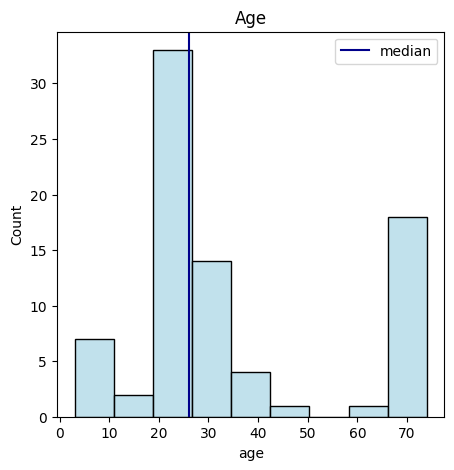

In [10]:
s.histploteo("age","Age",df).show()

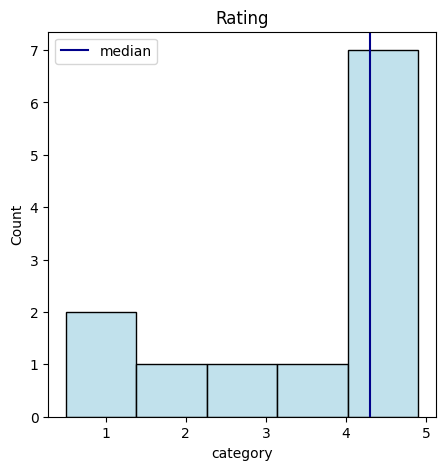

In [11]:
s.histploteo("category","Rating",df[df["filter"]=="rating"]).show()

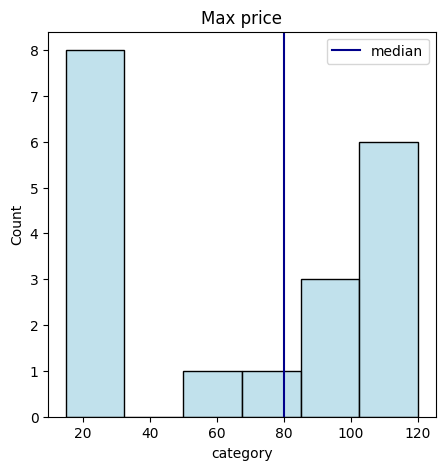

In [12]:
s.histploteo("category","Max price",df[df["filter"]=="price"]).show()

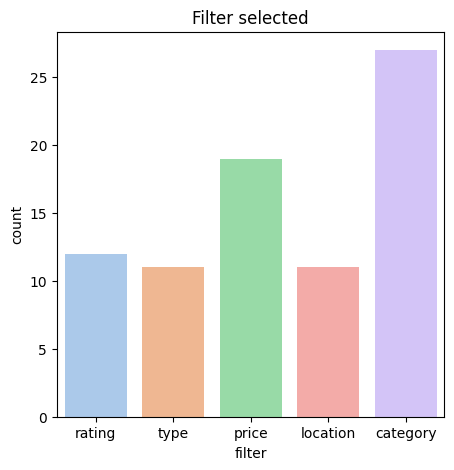

In [13]:
s.countploteo_no_hue("filter","Filter selected",df).show()

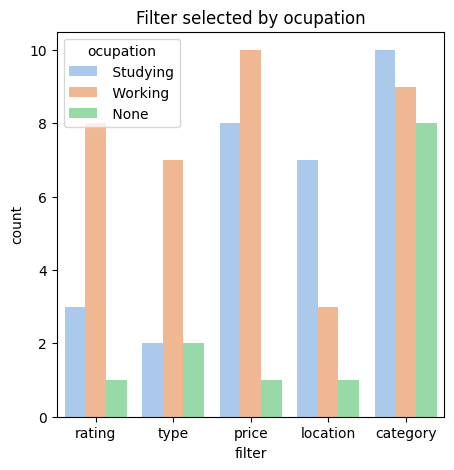

In [14]:
s.countploteo("filter","ocupation","Filter selected by ocupation",df).show()

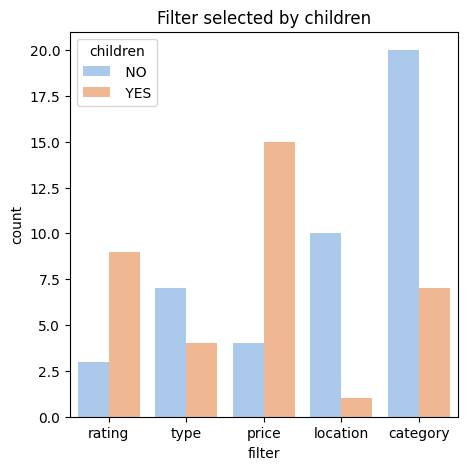

In [15]:
s.countploteo("filter","children","Filter selected by children",df).show()

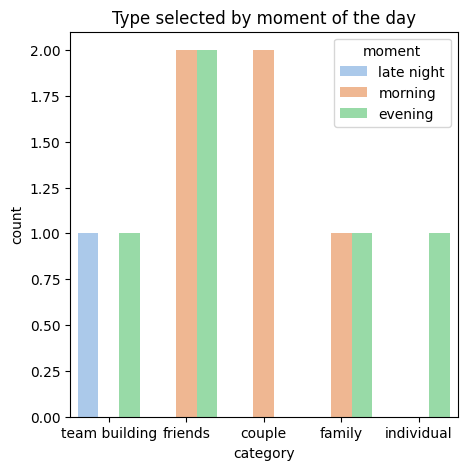

In [16]:
s.countploteo("category","moment","Type selected by moment of the day",df[df["filter"]=="type"]).show()

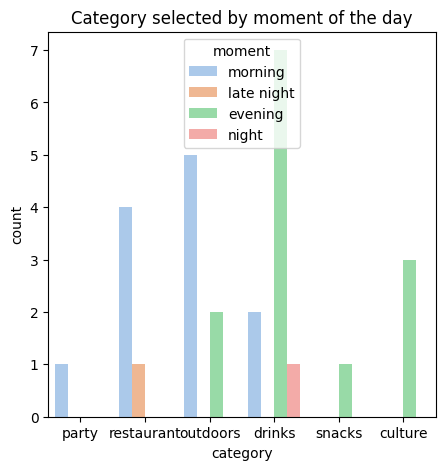

In [17]:
s.countploteo("category","moment","Category selected by moment of the day",df[df["filter"]=="category"]).show()

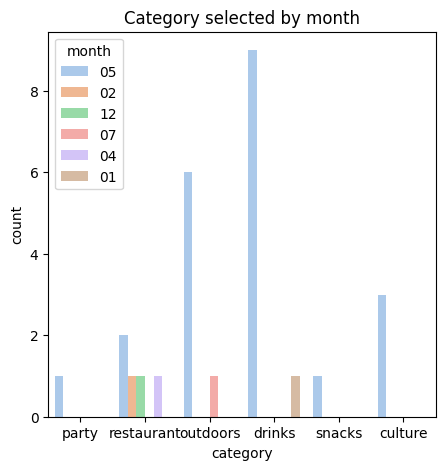

In [18]:
s.countploteo("category","month","Category selected by month",df[df["filter"]=="category"]).show()

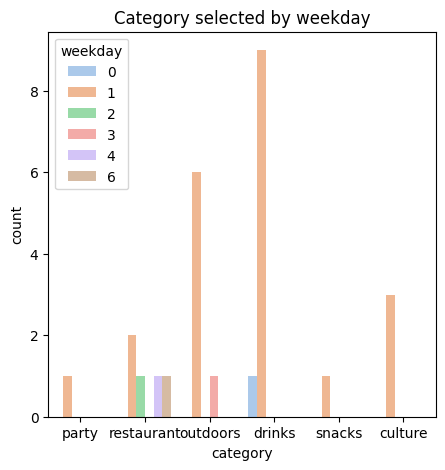

In [19]:
s.countploteo("category","weekday","Category selected by weekday",df[df["filter"]=="category"]).show()

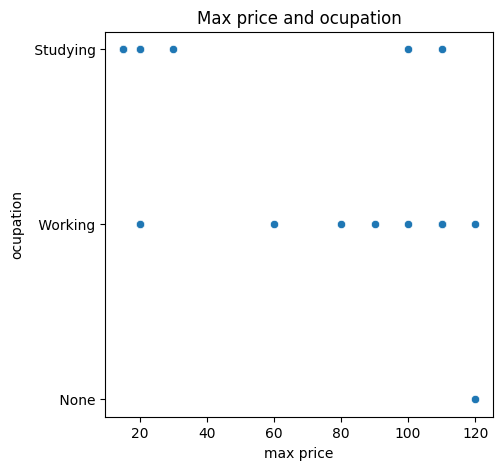

In [20]:
s.scatterploteo("category","ocupation","Max price and ocupation",df[df["filter"]=="price"],"max price").show()

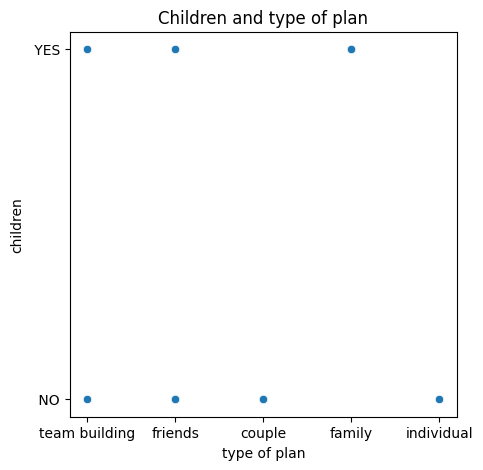

In [21]:
s.scatterploteo("category","children","Children and type of plan",df[df["filter"]=="type"],"type of plan").show()

## Machine learning

In [33]:
from sklearn.cluster import KMeans
from yellowbrick.cluster import KElbowVisualizer
from sklearn.datasets import make_blobs
from sklearn.metrics import pairwise_distances_argmin_min
import numpy as np
from mpl_toolkits.mplot3d import Axes3D


In [23]:
df_2 = df.drop(["name","category","subcategory","day","moment"],axis=1)

In [24]:
df_2["hour"] = df.apply(lambda row: f"{row['hour'][0:2]}", axis = 1)
df_2.hour = df_2.hour.astype(int)
df_2.month = df_2.month.astype(int)

In [25]:
df_2.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 80 entries, 0 to 86
Data columns (total 9 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   age        80 non-null     int64 
 1   filter     80 non-null     object
 2   weekday    80 non-null     int64 
 3   gender     80 non-null     object
 4   ocupation  80 non-null     object
 5   children   80 non-null     object
 6   residence  80 non-null     object
 7   hour       80 non-null     int64 
 8   month      80 non-null     int64 
dtypes: int64(4), object(5)
memory usage: 8.3+ KB


In [26]:
df_dummy = pd.get_dummies(df_2, prefix=['filter','gender', 'ocupation', 'children','residence'], columns=['filter','gender', 'ocupation', 'children','residence'], drop_first=True)

In [27]:
df_dummy.head(2)

,age,weekday,hour,month,filter_location,filter_price,filter_rating,filter_type,gender_ Male,gender_ Other,gender_ Female,gender_ Male,ocupation_ Studying,ocupation_ Working,children_ YES,residence_ Madrid,residence_ Outside of Spain
0,12,1,11,5,0,0,1,0,0,0,1,0,1,0,0,0,1
1,24,1,12,5,0,0,1,0,0,0,1,0,1,0,0,1,0


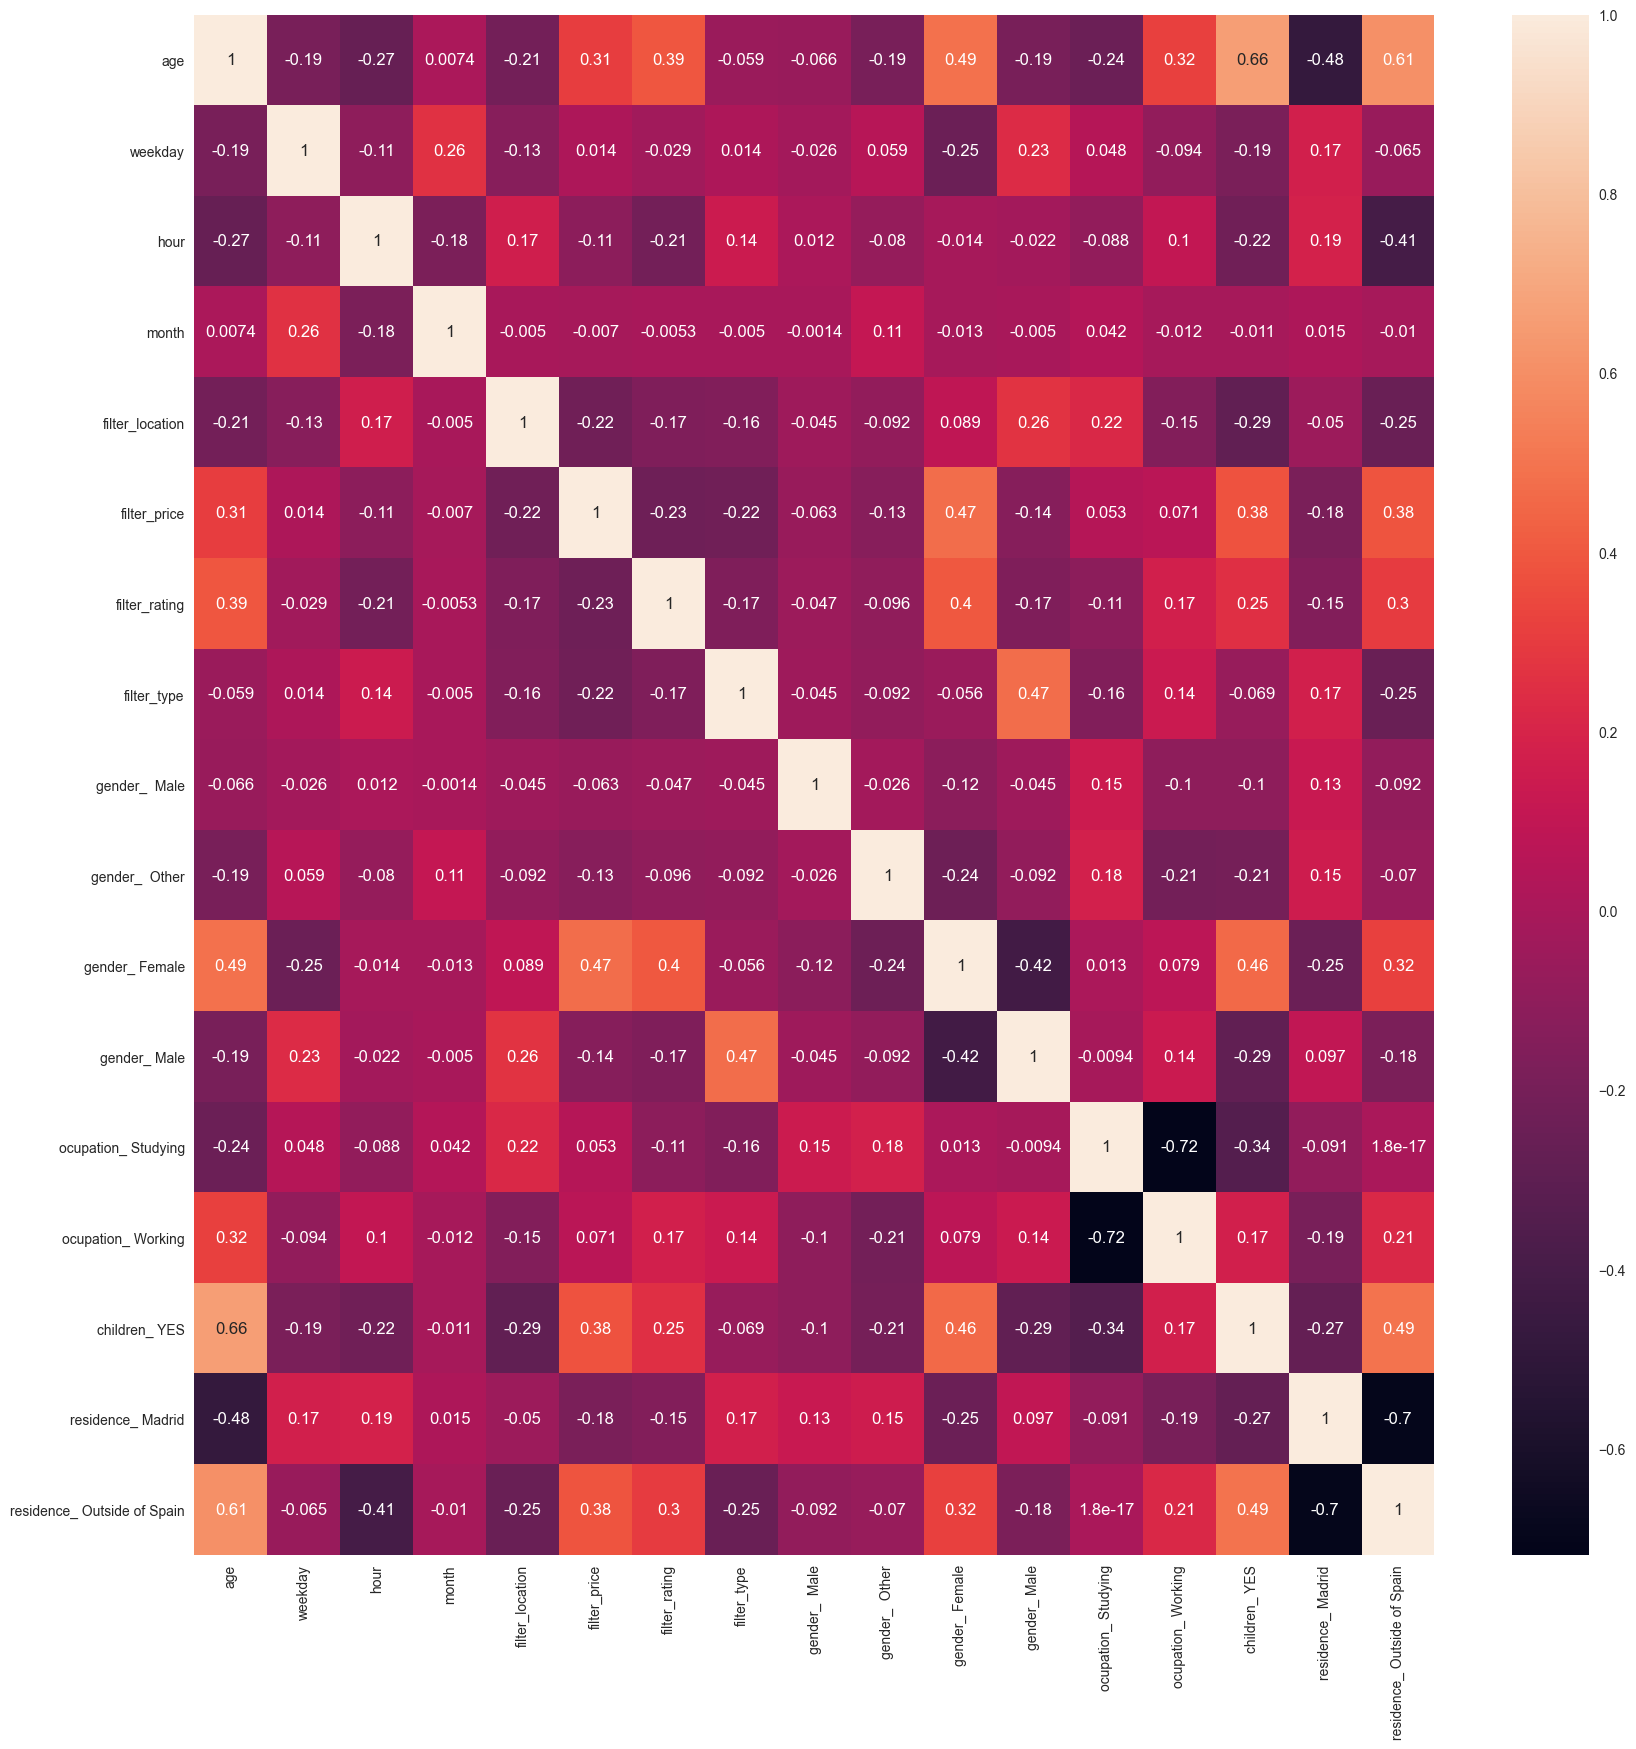

In [28]:
fig, ax = plt.subplots(figsize=(20, 20))
sns.heatmap(df_dummy.corr(), annot=True, ax=ax)
fig

There's no strong correlation between values, we keep all of them

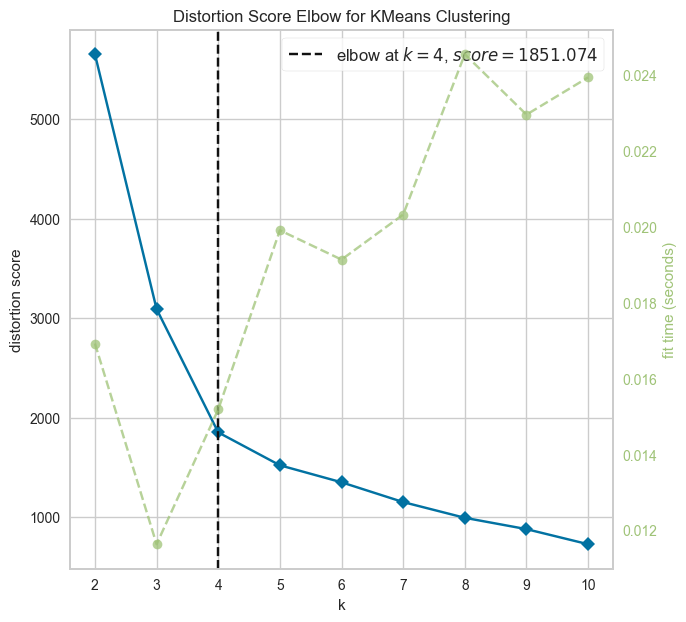

<AxesSubplot:title={'center':'Distortion Score Elbow for KMeans Clustering'}, xlabel='k', ylabel='distortion score'>

In [35]:
fig, ax = plt.subplots(figsize=(7, 7))
X = df_dummy
model = KElbowVisualizer(KMeans(), k=10)
model.fit(X)
model.show(ax=ax)

Following the elbow method, it is suggested to take 4 clusters.

In [43]:
%matplotlib inline
from mpl_toolkits.mplot3d import Axes3D
plt.rcParams['figure.figsize'] = (16, 9)
plt.style.use('ggplot')

In [66]:
kmeans = KMeans(n_clusters=4).fit(X)
centroids = kmeans.cluster_centers_
labels = kmeans.predict(X)
df_dummy["cluster"] = labels
df_2["cluster"] = labels

In [68]:
df_2[df_2["cluster"]==0]

,age,filter,weekday,gender,ocupation,children,residence,hour,month,cluster
0,12,rating,1,Female,Studying,NO,Outside of Spain,11,5,0
23,10,price,6,Male,Studying,NO,Madrid,15,5,0
47,10,location,1,Male,Studying,NO,Another city in Spain,11,5,0
65,10,category,1,Other,Studying,NO,Madrid,11,5,0
66,10,category,1,Other,Studying,NO,Madrid,17,5,0
67,10,category,3,Other,Studying,NO,Madrid,11,7,0
68,3,category,6,Female,None,NO,Madrid,11,4,0
69,3,category,1,Female,None,NO,Madrid,19,5,0
70,12,category,0,Female,Studying,NO,Outside of Spain,22,1,0


In [69]:
df_2[df_2["cluster"]==1]

,age,filter,weekday,gender,ocupation,children,residence,hour,month,cluster
3,74,rating,1,Female,Working,YES,Outside of Spain,12,5,1
4,74,rating,1,Female,Working,YES,Outside of Spain,12,5,1
5,74,rating,1,Female,Working,YES,Outside of Spain,12,5,1
6,74,rating,1,Female,Working,YES,Outside of Spain,12,5,1
7,74,rating,1,Female,Working,YES,Outside of Spain,12,5,1
8,74,rating,3,Female,Working,YES,Outside of Spain,12,5,1
9,74,rating,1,Female,Working,YES,Outside of Spain,12,5,1
10,74,rating,1,Female,Working,YES,Outside of Spain,12,5,1
17,60,type,1,Female,None,YES,Another city in Spain,11,5,1
24,74,price,1,Female,Working,YES,Outside of Spain,12,5,1


In [70]:
df_2[df_2["cluster"]==2]

,age,filter,weekday,gender,ocupation,children,residence,hour,month,cluster
1,24,rating,1,Female,Studying,NO,Madrid,12,5,2
2,24,rating,1,Female,Studying,NO,Madrid,12,5,2
11,28,rating,1,Female,None,YES,Madrid,13,5,2
14,26,type,1,Male,Working,NO,Madrid,11,5,2
15,26,type,5,Male,Working,NO,Madrid,19,5,2
16,27,type,1,Male,Studying,NO,Madrid,11,5,2
18,28,type,1,Female,None,YES,Madrid,13,5,2
21,21,type,1,Female,Working,NO,Madrid,16,5,2
22,26,type,1,Female,Studying,NO,Another city in Spain,18,5,2
39,22,price,1,Female,Studying,YES,Outside of Spain,12,5,2


In [71]:
df_2[df_2["cluster"]==3]

,age,filter,weekday,gender,ocupation,children,residence,hour,month,cluster
12,47,type,0,Female,Working,YES,Another city in Spain,21,5,3
13,31,type,1,Male,Working,NO,Madrid,11,5,3
19,33,type,1,Male,Working,NO,Outside of Spain,16,5,3
20,35,type,1,Male,Working,YES,Madrid,16,5,3
35,34,price,1,Female,Working,YES,Outside of Spain,12,5,3
36,34,price,1,Female,Working,YES,Outside of Spain,12,5,3
37,34,price,1,Female,Working,YES,Outside of Spain,12,5,3
52,33,location,1,Male,Working,NO,Outside of Spain,16,5,3
57,40,category,1,Other,None,NO,Outside of Spain,11,5,3
63,40,category,1,Female,Working,YES,Outside of Spain,11,5,3
